In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
# Reference https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [30]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [31]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [32]:
type(df['Date'])

pandas.core.series.Series

In [33]:
# Time series problem. Better to make date as index
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [34]:
type(df['Date'])

pandas.core.series.Series

In [35]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


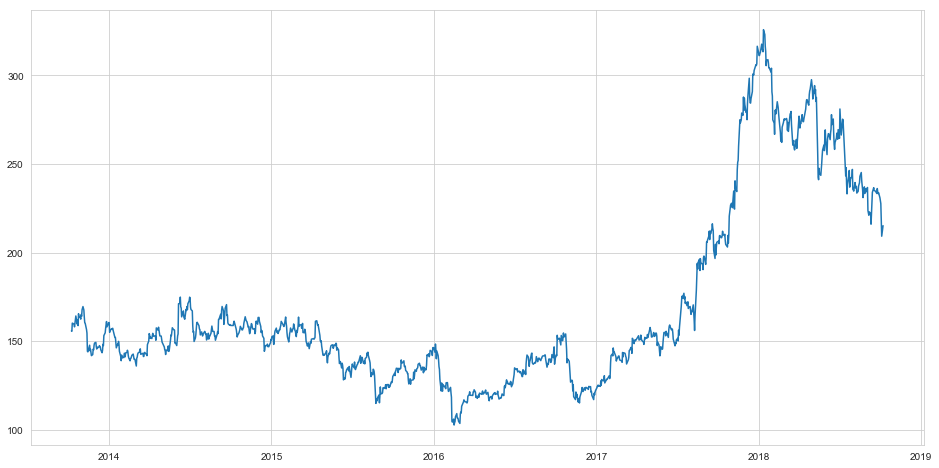

In [36]:
#plot target parameter i.e. Close price since profit/loss calculated on it
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [37]:
data = df.sort_index(ascending=True, axis=0)

In [38]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [39]:
#creating dataframe with date and the target variable
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [40]:
new_data.head()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [41]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [42]:
print(new_data.shape)
new_data.head()

(1235, 2)


,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [43]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component.
#So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

In [44]:
print(train.shape)
print(valid.shape)

(987, 2)
(248, 2)


In [45]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
104.51415465984348


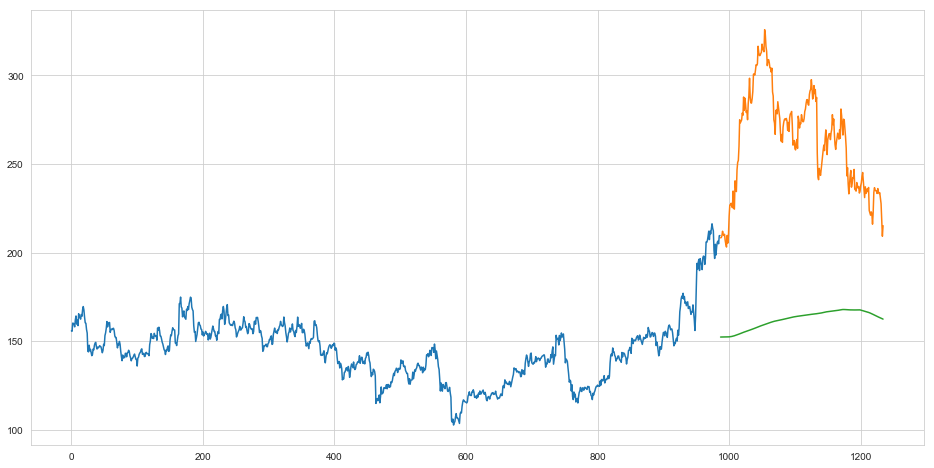

In [46]:
#plot
valid['Predictions'] = 0
plt.figure(figsize=(16,8))
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

This is bad prediction

In [47]:
#Using ARIMA for prediction

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
#ARIMA prerequesites
import Cython
import scipy
import statsmodels
print(np.__version__)
print(Cython.__version__)
print(sklearn.__version__)
print(scipy.__version__)
print(pd.__version__)
print(statsmodels.__version__)

1.16.2
0.29.6
0.20.3
1.3.1
0.24.2
0.10.1


In [50]:
#pip install pyramid-arima
#from pyramid.arima import auto_arima  # OlD import 
from pmdarima.arima import auto_arima # new arima

In [51]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
data = df.sort_index(ascending=True, axis=0)

In [52]:
data.drop(['Date'],inplace=True,axis=1)
data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [53]:
train = data['Close'][:987]
valid = data['Close'][987:]

#training = train['Close']
#validation = valid['Close']

In [54]:
print(data.shape)
print(train.shape)   #987+248=1235   around 80% is training
data.iloc[986:989]

(1235, 7)
(987,)


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2017-10-06,210.00,212.25,208.65,209.60,209.60,2534607.0,5332.72
2017-10-09,209.65,211.35,207.65,208.25,208.30,1653094.0,3454.22
2017-10-10,209.50,211.15,207.70,208.50,208.45,2125747.0,4448.80


In [55]:
train.head()

Date
2013-10-08    155.80
2013-10-09    155.55
2013-10-10    160.15
2013-10-11    160.05
2013-10-14    159.45
Name: Close, dtype: float64

In [56]:
model = auto_arima(train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0,
                   seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4820.561, BIC=4844.968, Fit time=6.047 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5479.245, BIC=5489.008, Fit time=0.084 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5170.275, BIC=5189.801, Fit time=1.435 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4818.529, BIC=4838.055, Fit time=4.880 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4816.433, BIC=4840.840, Fit time=4.299 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5170.276, BIC=5189.801, Fit time=1.368 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4818.340, BIC=4847.629, Fit time=19.021 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5481.156, BIC=5495.800, Fit time=0.341 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=4818.627, BIC=4852.797, Fit time=15.442 seconds
Fit ARIMA: order=(1, 1, 1)

In [58]:
model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [59]:
forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

In [60]:
forecast.head()

,Prediction
Date,
2017-10-09,210.363194
2017-10-10,210.067929
2017-10-11,211.438853
2017-10-12,212.201614
2017-10-13,211.829252


In [61]:
valid=pd.DataFrame(valid,columns=['Close'])
train=pd.DataFrame(train,columns=['Close'])
#  Sample df = pd.DataFrame(data, columns = ['Name', 'Age']) 

In [62]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

44.95286269845863

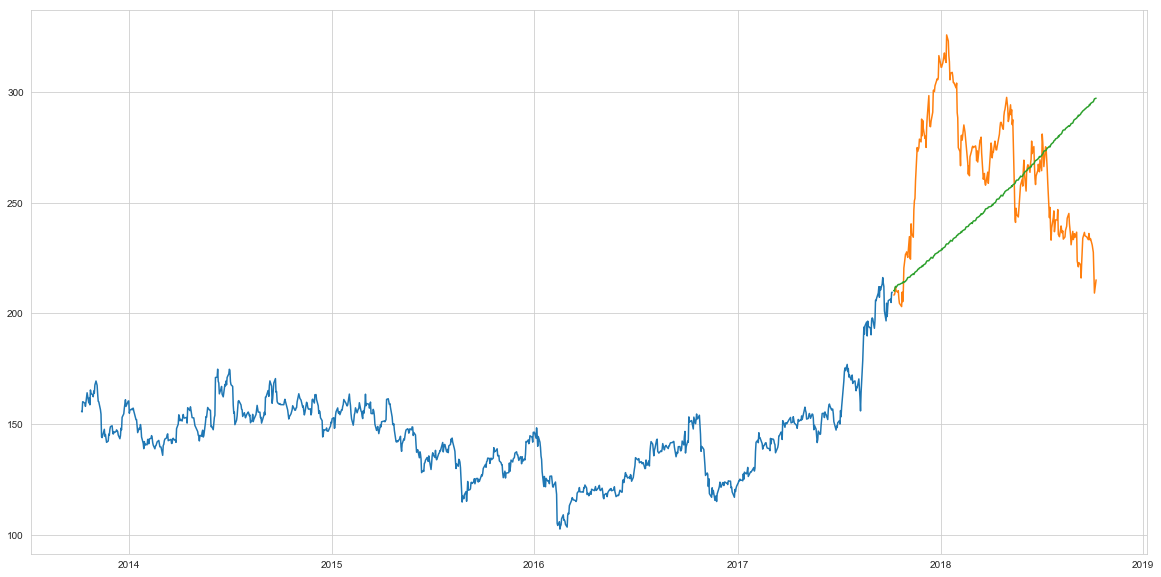

In [63]:
#plot
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

Not great prediction !
the model has captured a trend in the series, but does not focus on the seasonal part. In the next section,
we will implement a time series model that takes both trend and seasonality of a series into account.

# LSTM

In [ ]:
# Long Short Term Memory  : Keeps context,remember long time & forget unimportant data. Overcomes shortcoming of RNN

In [64]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [65]:
data = df.sort_index(ascending=True, axis=0)

In [66]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [67]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [68]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [69]:
new_data.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


In [70]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [71]:
new_data.index

DatetimeIndex(['2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11',
               '2013-10-14', '2013-10-15', '2013-10-17', '2013-10-18',
               '2013-10-21', '2013-10-22',
               ...
               '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
               '2018-09-28', '2018-10-01', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

In [72]:
new_data.shape

(1235, 1)

In [73]:
#creating train and test sets
dataset = new_data.values

In [74]:
train = dataset[0:987,:]
valid = dataset[987:,:]

In [93]:
valid[0]

array([208.3], dtype=object)

In [75]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [76]:
x_train, y_train = [], []

In [77]:
print(train.shape)
print(len(train))

(987, 1)
987


In [78]:
# we will consider last 60 days price for moving average
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [79]:
len(x_train)

927

In [80]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [81]:
x_train.shape[0],x_train.shape[1]

(927, 60)

In [82]:
x_train.shape

(927, 60)

In [83]:
type(x_train)

numpy.ndarray

In [84]:
x_train[0:2]

array([[0.23823398, 0.2371134 , 0.25773196, 0.25728373, 0.25459435,
        0.24831914, 0.2660242 , 0.27588525, 0.2552667 , 0.26535186,
        0.25145675, 0.28148812, 0.27431645, 0.27162707, 0.26781712,
        0.27947109, 0.27498879, 0.29157329, 0.29964142, 0.29112506,
        0.27297176, 0.25862842, 0.25750784, 0.2415957 , 0.23263111,
        0.18668758, 0.18511878, 0.20192739, 0.18780816, 0.19139399,
        0.18377409, 0.17548185, 0.17817122, 0.19206634, 0.19004931,
        0.20170327, 0.20730614, 0.20909906, 0.19789332, 0.19229045,
        0.19722098, 0.19520394, 0.19744509, 0.20080681, 0.19878978,
        0.19766921, 0.19049753, 0.18287763, 0.18870462, 0.20416853,
        0.20103093, 0.22613178, 0.23330345, 0.2447333 , 0.26176602,
        0.24831914, 0.25616316, 0.25907665, 0.25930076, 0.23442403],
       [0.2371134 , 0.25773196, 0.25728373, 0.25459435, 0.24831914,
        0.2660242 , 0.27588525, 0.2552667 , 0.26535186, 0.25145675,
        0.28148812, 0.27431645, 0.27162707, 0.2

In [85]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [86]:
x_train.shape

(927, 60, 1)

In [ ]:
x_train[0]

In [89]:
(x_train.shape[1],1)

(60, 1)

In [90]:
y_train.shape

(927,)

In [91]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

W1020 22:56:23.806644 21252 deprecation_wrapper.py:119] From C:\Users\akashmas\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1020 22:56:23.843745 21252 deprecation_wrapper.py:119] From C:\Users\akashmas\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1020 22:56:23.853770 21252 deprecation_wrapper.py:119] From C:\Users\akashmas\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1020 22:56:24.306978 21252 deprecation_wrapper.py:119] From C:\Users\akashmas\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v

Epoch 1/1
 - 69s - loss: 0.0010


In [ ]:
#https://github.com/krishnaik06/Stock-Sentiment-Analysis/blob/master/Stock%20Sentiment%20Analysis.ipynb

In [97]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [98]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [99]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [100]:
print(closing_price.shape)
print(valid.shape)
print(X_test.shape)

(248, 1)
(248, 1)
(248, 60, 1)


In [101]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

11.992402408355105

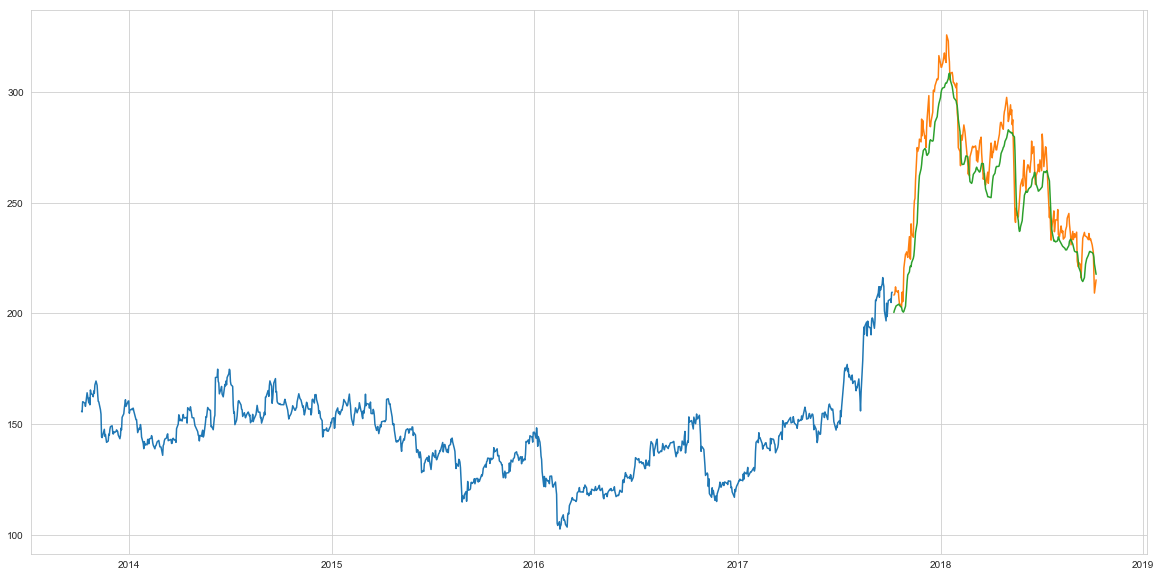

In [102]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [ ]:
xgb